In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
from Bash_Tool import GetEOSFileList

chain_only_QEL = ROOT.TChain("psdtree")
chain_all_process = ROOT.TChain("psdtree")

prefix_eos = "root://junoeos01.ihep.ac.cn/"
dir_eos_only_QEL = "/eos/juno/user/luoxj/RawData_DSNB/atmNC/"
dir_eos_all_process = "/eos/juno/user/luoxj/Sim_DSNB/AtmNu_three_components_all_process/RawData/"
# dir_eos_all_process = "/eos/juno/user/luoxj/Sim_DSNB/AtmNu/RawData/"
v_name_files_only_QEL = GetEOSFileList(dir_eos_only_QEL)
v_name_files_all_process = GetEOSFileList(dir_eos_all_process)

print("Only QEL files list:\t",v_name_files_only_QEL)
print("All process files list:\t", v_name_files_all_process)
for name_file in v_name_files_only_QEL:
    chain_only_QEL.Add(f"{prefix_eos}{dir_eos_only_QEL}{name_file}")
for name_file in v_name_files_all_process:
    chain_all_process.Add(f"{prefix_eos}{dir_eos_all_process}{name_file}")
    

Only QEL files list:	 ['atmNC_000001.root', 'atmNC_000002.root', 'atmNC_000003.root', 'atmNC_000004.root', 'atmNC_000005.root', 'atmNC_000006.root', 'atmNC_000007.root', 'atmNC_000008.root', 'atmNC_000009.root', 'atmNC_000010.root', 'atmNC_000011.root', 'atmNC_000012.root', 'atmNC_000013.root', 'atmNC_000014.root', 'atmNC_000015.root', 'atmNC_000016.root', 'atmNC_000017.root', 'atmNC_000018.root', 'atmNC_000019.root', 'atmNC_000020.root', 'atmNC_000021.root', 'atmNC_000022.root', 'atmNC_000023.root', 'atmNC_000024.root', 'atmNC_000025.root', 'atmNC_000026.root', 'atmNC_000027.root', 'atmNC_000028.root', 'atmNC_000029.root', 'atmNC_000030.root', 'atmNC_000031.root', 'atmNC_000032.root', 'atmNC_000033.root', 'atmNC_000034.root', 'atmNC_000035.root', 'atmNC_000036.root', 'atmNC_000037.root', 'atmNC_000038.root', 'atmNC_000039.root', 'atmNC_000040.root', 'atmNC_000041.root', 'atmNC_000042.root', 'atmNC_000043.root', 'atmNC_000044.root', 'atmNC_000045.root', 'atmNC_000046.root', 'atmNC_0000

In [3]:
import tqdm
entries = 100000
# entries = 1000
dir_chain = {"only_QEL":chain_only_QEL, "all_process":chain_all_process}
dir_v_equen = {}
for key in dir_chain.keys():
    dir_v_equen[key] = []
    dir_chain[key].SetBranchStatus("*",0)
    dir_chain[key].SetBranchStatus("Eqen",1)
for i_entry in tqdm.trange(entries):
    for key in dir_chain.keys():
        dir_chain[key].GetEntry(i_entry)
        dir_v_equen[key].append(dir_chain[key].Eqen)


100%|██████████| 100000/100000 [05:50<00:00, 285.44it/s]


<ipython-input-9-e610113a953e>:36: RuntimeWarning: invalid value encountered in true_divide
  ( ( (dir_Equen_hist["only_QEL"][0]/dir_max["only_QEL"])**0.5/dir_Equen_hist["only_QEL"][0])**2+


(array([0.00704236, 0.00994042, 0.01333134, 0.01638947, 0.01913721,
       0.02214683, 0.0305431 , 0.06055511, 0.1169286 , 0.12651224,
       0.15853102, 0.18840636, 0.24534342, 0.20882628, 0.22347088,
       0.22287314, 0.21756435, 0.27005568, 0.25322074, 0.3186964 ,
       0.50162602, 0.3804337 , 0.57918995, 1.00127146, 1.00160128,
       1.00242425,        nan,        nan,        nan]),)


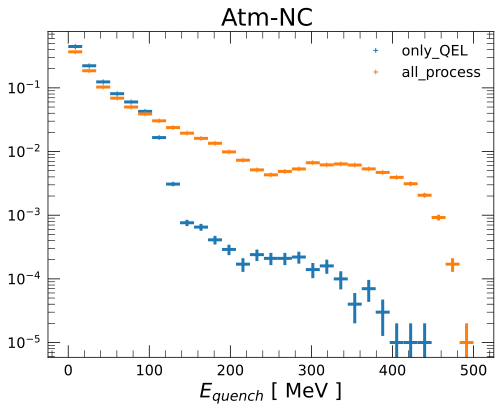

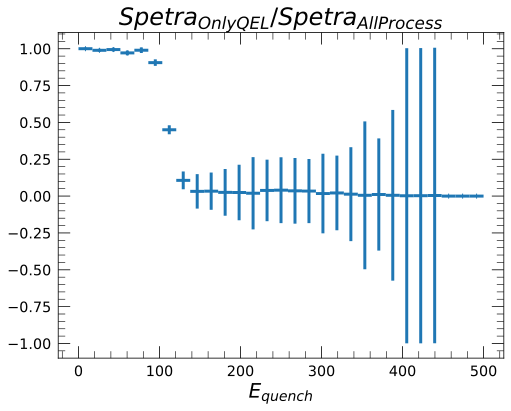

In [9]:
Equen_uplimit = 500
Equen_downlimit = 0
dir_Equen_hist = {}
for key in dir_chain.keys():
    dir_v_equen[key] = np.array(dir_v_equen[key])
    index_quench_cut = ( (dir_v_equen[key]>Equen_downlimit) & (dir_v_equen[key]<Equen_uplimit) )
    # plt.hist(dir_v_equen[key][index_quench_cut], bins=np.linspace(0,Equen_uplimit, 30),histtype="step",
    #          label=key, density=True)
    dir_Equen_hist[key] = np.histogram(dir_v_equen[key][index_quench_cut],
                                       bins=np.linspace(0,Equen_uplimit, 30))
# plt.semilogy()
# from importlib import reload
# import PlotErrorBar
# reload(PlotErrorBar)
from PlotErrorBar import PLotDataWithErrorBar_numpy
for key in dir_Equen_hist.keys():
    # PLotDataWithErrorBar_numpy(dir_Equen_hist[key][0]/np.sum(dir_Equen_hist[key][0]),
    #                            dir_Equen_hist[key][1],
    #                            dir_Equen_hist[key][0]**0.5/np.sum(dir_Equen_hist[key][0]))
    PLotDataWithErrorBar_numpy(dir_Equen_hist[key][0],
                               dir_Equen_hist[key][1],density=True,
                               label=key)
plt.semilogy()
# plt.ylim(0.01,0.1)
plt.legend()
plt.xlabel("$E_{quench}$ [ MeV ]")
plt.title("Atm-NC ")
plt.savefig(f"./figure/Comparision_QEL_NC_{Equen_downlimit}-{Equen_uplimit}.png")
dir_max = {}
plt.figure()
for key in dir_Equen_hist.keys():
    dir_Equen_hist[key] = list(dir_Equen_hist[key])
    dir_max[key] = np.max(dir_Equen_hist[key][0])
    dir_Equen_hist[key][0] = dir_Equen_hist[key][0]/dir_max[key]
sigma_only_QEL_divide_all_process = \
    ( ( (dir_Equen_hist["only_QEL"][0]/dir_max["only_QEL"])**0.5/dir_Equen_hist["only_QEL"][0])**2+
    ( ( dir_Equen_hist["all_process"][0]/dir_max["all_process"])**0.5/dir_Equen_hist["all_process"][0])**2 )**0.5 ,
ratio_only_QEL_divide_all_process = dir_Equen_hist["only_QEL"][0]/dir_Equen_hist["all_process"][0]
print(sigma_only_QEL_divide_all_process)
PLotDataWithErrorBar_numpy(ratio_only_QEL_divide_all_process, dir_Equen_hist["only_QEL"][1],
                           sigma_only_QEL_divide_all_process[0])
plt.xlabel("$E_{quench}$")
plt.title("$Spetra_{OnlyQEL}/Spetra_{AllProcess}$")
plt.savefig(f"./figure/Ratio_Comparison_QEL_NC_{Equen_downlimit}_{Equen_uplimit}.png")
# plt.ylim(0.8, 1.1)

In [5]:
# Test Tools
